In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import sys,os
home = os.getcwd() + '/../'
sys.path.append(home)

from sampling.sampler import Sampler, OutputType
from sampling.dynamics import leapfrog
from benchmarks.interactive_gallery import targets

Banana
Donout
Standard Normal
Gaussian Mixture
Funnel
Squiggle


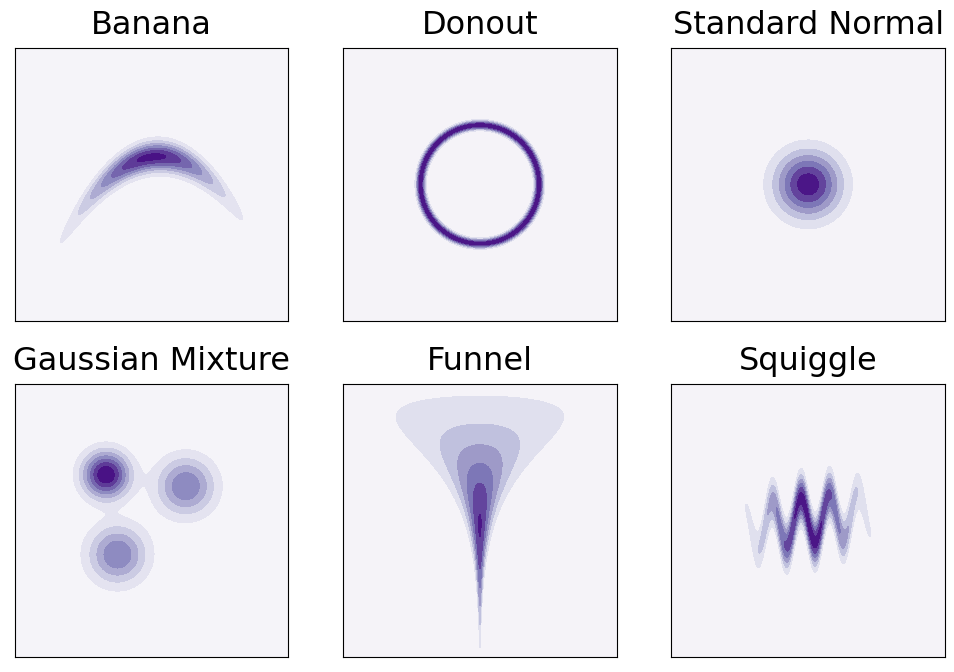

In [2]:
# visualize the targets

n = 400
x = jnp.linspace(-6., 6., n)
y = jnp.linspace(-6., 6., n)

X, Y = np.meshgrid(x, y)
R = jnp.array([X, Y])
R = jnp.concatenate(jnp.moveaxis(R, [0, 1, 2], [2, 0, 1]))

plt.figure(figsize = (12, 8))
i = 1
for name, target in targets.items():
    print(name)
    Z = jax.vmap(target.nlogp)(R).reshape(n, n)
    plt.subplot(2, 3, i)
    plt.title(name, fontsize = 23, y = 1.02)
    plt.gca().set_aspect('equal')
    plt.contourf(X, Y, jnp.exp(-Z), cmap = 'Purples')
    plt.xticks([])
    plt.yticks([])
    i+=1

plt.show()

In [12]:
for name, target in targets.items():
    sampler = Sampler(target, varEwanted= 1e-4, integrator= leapfrog, frac_tune1= 0.3, frac_tune2= 0.3, frac_tune3= 0.3)
    x, E, L, eps = sampler.sample(10000, output = OutputType.detailed)
    print(name + ': ' + str((int)(np.rint(L/eps))) + ' LF steps with eps = {0:.3}'.format(eps))

Banana: 17 LF steps with eps = 0.18
Donout: 68 LF steps with eps = 0.0652
Standard Normal: 3 LF steps with eps = 0.464
Gaussian Mixture: 35 LF steps with eps = 0.38
Funnel: 60 LF steps with eps = 0.368
Squiggle: 111 LF steps with eps = 0.0738
